
# Project Overview:

I chose to work with a dataset that shows average Bagrut (Israeli matriculation) exam scores from various cities and sectors in Israel, covering the years 2017 to 2019. The dataset contains around 44,000 records of 116 bagrut subjects in 306 different cities that shows 4 different sectors in the Israeli community.
The data came from the site of the israeli movement for freedom of information: https://www.meida.org.il/11222.

I used 3 files in "ציוני הבגרות לפי שנים":
- 'התפלגות מספר נבחנים וממוצע ציון סופי לפי מוסד 2019.xlsx'
- 'התפלגות מספר נבחנים וממוצע ציון סופי לפי מוסד 2018.xlsx'
- 'התפלגות מספר נבחנים וממוצע ציון סופי לפי מוסד 2017.xlsx'

The goal of this project is to examine differences in Bagrut scores between sectors and jewish dominations in Israel, identify trends in the education system over time and between subjects.

Main Research Questions:

* Distribution of Scores:
    - Is the distribution is going right, left or it is normal? in other words, did the students in general pass the bagrut exams?

* Differences Between Sectors and Denominatins:
    - Are there significant differences in average Bagrut scores between sectors?

* Trends Over Time:
    - Do Bagrut scores change over the years 2017-2019?
    - Are these changes consistent across sectors and subjects denominations?

* Subject Performance:
    - What is the top 10 subjects every sector and denomination attends?
    - How do sectors and denominations differ in their scores for English, Math, and native language (Hebrew/Arabic)?

Tools and Techniques:
The analysis will be done using Python, with libraries like Pandas, NumPy, Matplotlib, and Seaborn.
I will use descriptive statistics and visualizations such as histogram plots, bar plots, heatmaps and more.

Workflow:
1. Import the files
2. Concat the files
3. Cleaning the dataset
4. EDA - Exploratory Data Analysis
5. Summery and conclusions

# Importing and Organizing the Files in DF`s

In [1]:
#%pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [3]:
#Loading the data
#The first 15 rows are not relevant, notes from the original excel file
bagrut19=pd.read_excel('התפלגות מספר נבחנים וממוצע ציון סופי לפי מוסד 2019.xlsx',skiprows=15)
bagrut19=bagrut19.dropna(how='all')
bagrut19.reset_index(drop=True, inplace=True)
bagrut19.columns=['Avg_Final_Score','Number_of_Examinees','Units','Year','Subject','City','Institution_Name',
              'Institution_Code','Supervision','Sector','District'] #The names of the columns are in Hebrew so I changed them to English
bagrut19

,Avg_Final_Score,Number_of_Examinees,Units,Year,Subject,City,Institution_Name,Institution_Code,Supervision,Sector,District
0,72.38,66.0,2.0,2019.0,אזרחות,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
1,75.00,32.0,3.0,2019.0,אנגלית,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
2,74.44,16.0,4.0,2019.0,אנגלית,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
3,81.81,21.0,5.0,2019.0,אנגלית,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
4,77.19,32.0,5.0,2019.0,ביולוגיה,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
...,...,...,...,...,...,...,...,...,...,...,...
15187,82.67,12.0,3.0,2019.0,יהדות,תל אביב - יפו,תיכון בית יעקב תל אב,714857.0,עצמאי,יהודי,חרדי
15188,75.54,13.0,5.0,2019.0,מדע וטכנולוגיה לכל,תל אביב - יפו,תיכון בית יעקב תל אב,714857.0,עצמאי,יהודי,חרדי
15189,67.18,11.0,2.0,2019.0,ספרות,תל אביב - יפו,תיכון בית יעקב תל אב,714857.0,עצמאי,יהודי,חרדי
15190,80.33,12.0,5.0,2019.0,פסיכולוגיה התפתחותית,תל אביב - יפו,תיכון בית יעקב תל אב,714857.0,עצמאי,יהודי,חרדי


In [4]:
bagrut18=pd.read_excel('התפלגות מספר נבחנים וממוצע ציון סופי לפי מוסד 2018.xlsx',skiprows=15)
bagrut18=bagrut18.dropna(how='all')
bagrut18.reset_index(drop=True, inplace=True)
bagrut18.columns=['Avg_Final_Score','Number_of_Examinees','Units','Year','Subject','City','Institution_Name',
              'Institution_Code','Supervision','Sector','District']
bagrut18

,Avg_Final_Score,Number_of_Examinees,Units,Year,Subject,City,Institution_Name,Institution_Code,Supervision,Sector,District
0,74.51,72.0,2.0,2018.0,אזרחות,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
1,73.88,24.0,3.0,2018.0,אנגלית,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
2,76.54,35.0,4.0,2018.0,אנגלית,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
3,85.20,15.0,5.0,2018.0,אנגלית,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
4,72.40,45.0,5.0,2018.0,ביולוגיה,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
...,...,...,...,...,...,...,...,...,...,...,...
14970,96.21,66.0,3.0,2018.0,ניהול משאבי אנוש,תל אביב - יפו,בית יעקב,570606.0,עצמאי,יהודי,חרדי
14971,78.27,33.0,2.0,2018.0,ספרות,תל אביב - יפו,בית יעקב,570606.0,עצמאי,יהודי,חרדי
14972,92.26,23.0,5.0,2018.0,עצוב,תל אביב - יפו,בית יעקב,570606.0,עצמאי,יהודי,חרדי
14973,99.07,14.0,5.0,2018.0,תכנון ותכנות מערכות,תל אביב - יפו,בית יעקב,570606.0,עצמאי,יהודי,חרדי


In [5]:
bagrut17=pd.read_excel('התפלגות מספר נבחנים וממוצע ציון סופי לפי מוסד 2017.xlsx',skiprows=15)
bagrut17=bagrut17.dropna(how='all')
bagrut17.reset_index(drop=True, inplace=True)
bagrut17.columns=['Avg_Final_Score','Number_of_Examinees','Units','Year','Subject','City','Institution_Name',
              'Institution_Code','Supervision','Sector','District']
bagrut17

,Avg_Final_Score,Number_of_Examinees,Units,Year,Subject,City,Institution_Name,Institution_Code,Supervision,Sector,District
0,74.21,57.0,2.0,2017.0,אזרחות,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
1,70.67,24.0,3.0,2017.0,אנגלית,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
2,78.52,21.0,4.0,2017.0,אנגלית,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
3,77.57,14.0,5.0,2017.0,אנגלית,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
4,73.55,40.0,5.0,2017.0,ביולוגיה,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
...,...,...,...,...,...,...,...,...,...,...,...
14179,94.62,47.0,3.0,2017.0,ניהול משאבי אנוש,תל אביב - יפו,בית יעקב,570606.0,עצמאי,יהודי,חרדי
14180,74.46,26.0,2.0,2017.0,ספרות,תל אביב - יפו,בית יעקב,570606.0,עצמאי,יהודי,חרדי
14181,94.67,24.0,5.0,2017.0,עצוב,תל אביב - יפו,בית יעקב,570606.0,עצמאי,יהודי,חרדי
14182,97.00,19.0,5.0,2017.0,תכנון ותכנות מערכות,תל אביב - יפו,בית יעקב,570606.0,עצמאי,יהודי,חרדי


# Concatination

In [6]:
#Join the data from all years into one df
bagrut_all_years=pd.concat([bagrut19,bagrut18,bagrut17], ignore_index=True)
bagrut_all_years

,Avg_Final_Score,Number_of_Examinees,Units,Year,Subject,City,Institution_Name,Institution_Code,Supervision,Sector,District
0,72.38,66.0,2.0,2019.0,אזרחות,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
1,75.00,32.0,3.0,2019.0,אנגלית,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
2,74.44,16.0,4.0,2019.0,אנגלית,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
3,81.81,21.0,5.0,2019.0,אנגלית,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
4,77.19,32.0,5.0,2019.0,ביולוגיה,אבו גוש,מקיף אבו גוש,148080.0,כללי,ערבי,ירושלים
...,...,...,...,...,...,...,...,...,...,...,...
44346,94.62,47.0,3.0,2017.0,ניהול משאבי אנוש,תל אביב - יפו,בית יעקב,570606.0,עצמאי,יהודי,חרדי
44347,74.46,26.0,2.0,2017.0,ספרות,תל אביב - יפו,בית יעקב,570606.0,עצמאי,יהודי,חרדי
44348,94.67,24.0,5.0,2017.0,עצוב,תל אביב - יפו,בית יעקב,570606.0,עצמאי,יהודי,חרדי
44349,97.00,19.0,5.0,2017.0,תכנון ותכנות מערכות,תל אביב - יפו,בית יעקב,570606.0,עצמאי,יהודי,חרדי


# Learn and Clean the Data

In [7]:
bagrut_all_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44351 entries, 0 to 44350
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Avg_Final_Score      44351 non-null  float64
 1   Number_of_Examinees  44351 non-null  float64
 2   Units                44351 non-null  float64
 3   Year                 44351 non-null  float64
 4   Subject              44351 non-null  object 
 5   City                 44351 non-null  object 
 6   Institution_Name     44351 non-null  object 
 7   Institution_Code     44351 non-null  float64
 8   Supervision          44351 non-null  object 
 9   Sector               44351 non-null  object 
 10  District             44351 non-null  object 
dtypes: float64(5), object(6)
memory usage: 3.7+ MB


In [8]:
#The float type is unnecessary in some of the columns, converting them to int
columns_to_int = ['Number_of_Examinees','Units','Year','Institution_Code']
for col in columns_to_int:
    print ('converting to int in: ' + col)
    bagrut_all_years[col]=bagrut_all_years[col].astype(int)
    print ('all the val are int')

converting to int in: Number_of_Examinees
all the val are int
converting to int in: Units
all the val are int
converting to int in: Year
all the val are int
converting to int in: Institution_Code
all the val are int


In [9]:
bagrut_all_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44351 entries, 0 to 44350
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Avg_Final_Score      44351 non-null  float64
 1   Number_of_Examinees  44351 non-null  int64  
 2   Units                44351 non-null  int64  
 3   Year                 44351 non-null  int64  
 4   Subject              44351 non-null  object 
 5   City                 44351 non-null  object 
 6   Institution_Name     44351 non-null  object 
 7   Institution_Code     44351 non-null  int64  
 8   Supervision          44351 non-null  object 
 9   Sector               44351 non-null  object 
 10  District             44351 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 3.7+ MB


In [10]:
#Checking if all the institutions checked the same number of years in the data
bagrut_all_years.groupby('Institution_Code')['Year'].nunique().value_counts().to_frame()

,count
Year,
3,933
2,94
1,69


In [11]:
#Clearing all the institutions that not checked 3 years in a row
chk_inst_years=bagrut_all_years.groupby('Institution_Code')['Year'].nunique()
inst_to_keep=chk_inst_years[chk_inst_years == 3].index
bagrut_all_years=bagrut_all_years[bagrut_all_years['Institution_Code'].isin(inst_to_keep)]
bagrut_all_years

,Avg_Final_Score,Number_of_Examinees,Units,Year,Subject,City,Institution_Name,Institution_Code,Supervision,Sector,District
0,72.38,66,2,2019,אזרחות,אבו גוש,מקיף אבו גוש,148080,כללי,ערבי,ירושלים
1,75.00,32,3,2019,אנגלית,אבו גוש,מקיף אבו גוש,148080,כללי,ערבי,ירושלים
2,74.44,16,4,2019,אנגלית,אבו גוש,מקיף אבו גוש,148080,כללי,ערבי,ירושלים
3,81.81,21,5,2019,אנגלית,אבו גוש,מקיף אבו גוש,148080,כללי,ערבי,ירושלים
4,77.19,32,5,2019,ביולוגיה,אבו גוש,מקיף אבו גוש,148080,כללי,ערבי,ירושלים
...,...,...,...,...,...,...,...,...,...,...,...
44346,94.62,47,3,2017,ניהול משאבי אנוש,תל אביב - יפו,בית יעקב,570606,עצמאי,יהודי,חרדי
44347,74.46,26,2,2017,ספרות,תל אביב - יפו,בית יעקב,570606,עצמאי,יהודי,חרדי
44348,94.67,24,5,2017,עצוב,תל אביב - יפו,בית יעקב,570606,עצמאי,יהודי,חרדי
44349,97.00,19,5,2017,תכנון ותכנות מערכות,תל אביב - יפו,בית יעקב,570606,עצמאי,יהודי,חרדי


In [12]:
bagrut_all_years.groupby('Institution_Code')['Year'].nunique().value_counts().to_frame()

,count
Year,
3,933


In [13]:
bagrut_all_years['Institution_Code'].nunique()

933

In [14]:
bagrut_all_years['Institution_Name'].nunique()

912

In [15]:
#Checking how many institution codes have the same name
bagrut_all_years.groupby('Institution_Code')['Institution_Name'].nunique().value_counts().to_frame()

,count
Institution_Name,
1,911
2,22


In [16]:
#Creating an array with the institution codes that have 2 different names
duplicate_codes=bagrut_all_years.groupby('Institution_Code')['Institution_Name'].nunique()\
[bagrut_all_years.groupby('Institution_Code')['Institution_Name'].nunique() == 2].index

duplicate_codes


Index([141010, 160580, 240077, 240630, 244624, 260059, 338616, 340216, 440487,
       440909, 448159, 453605, 470120, 470963, 540302, 541862, 570085, 610006,
       640102, 640391, 648089, 770859],
      dtype='int64', name='Institution_Code')

In [17]:
#Checking the institution codes that have 2 names
duplicate_inst = bagrut_all_years[bagrut_all_years['Institution_Code'].isin(duplicate_codes)]\
    [['Institution_Code', 'Institution_Name', 'Year','City','Sector','District','Supervision']]\
    .sort_values(by=['Institution_Code', 'Year']).drop_duplicates()

duplicate_inst.shape

(66, 7)

In [18]:
duplicate_inst.head(33)

# If the years differ, it may indicate that the institution has changed its name
# If the city differs, it could mean that the institution relocated to a different city,
#   or that there are two institutions sharing the same code in different cities
# In such cases, I will drop that institution from the dataset
# The same logic applies to differences in sector and district
# I also checked the supervision field. While it may change over time, it is not relevant in this case. 
#   I reviewed it across all years, and it remained consistent.
# I will perform the same check for the last 33 institutions.

,Institution_Code,Institution_Name,Year,City,Sector,District,Supervision
42781,141010,"אורט רמות ע""ש י'גדיש",2017,ירושלים,יהודי,מנח'י,כללי
28486,141010,"אורט רמות ע""ש י'גדיש",2018,ירושלים,יהודי,מנח'י,כללי
13451,141010,מכללת אורט גבעת רם,2019,ירושלים,יהודי,מנח'י,כללי
30936,160580,אולפנת אורות עציון,2017,ראש צורים,יהודי,ירושלים,דתי
15988,160580,אולפנת אורות עציון,2018,ראש צורים,יהודי,ירושלים,דתי
886,160580,"אול' בנ""ע ראש צורים",2019,ראש צורים,יהודי,ירושלים,דתי
39734,240077,אורט שרת נצרת עילית,2017,נצרת עילית,יהודי,צפון,כללי
25184,240077,אורט שרת נצרת עילית,2018,נצרת עילית,יהודי,צפון,כללי
9929,240077,מקיף שרת,2019,נוף הגליל,יהודי,צפון,כללי
42282,240630,בני הגולן,2017,רמת מגשימים,יהודי,חינוך התישבותי,דתי


In [19]:
bagrut_all_years=bagrut_all_years.drop([39734,25184,9929], axis=0).reset_index(drop=True)

In [20]:
duplicate_inst.tail(33)

,Institution_Code,Institution_Name,Year,City,Sector,District,Supervision
33556,453605,בר אילן בנים,2017,נתניה,יהודי,תל אביב,דתי
18725,453605,אמית בר אילן,2018,נתניה,יהודי,תל אביב,דתי
3644,453605,אמית בר אילן,2019,נתניה,יהודי,תל אביב,דתי
35558,470120,"אורט לוד ע""ש זייל",2017,לוד,יהודי,מרכז,כללי
20791,470120,"אורט לוד ע""ש זייל",2018,לוד,יהודי,מרכז,כללי
5731,470120,מנהיגות ולמדעים לוד,2019,לוד,יהודי,מרכז,כללי
35073,470963,מקיף אורן-גינזבורג,2017,יבנה,יהודי,מרכז,כללי
20275,470963,ק.חינוך עש גינסבורג,2018,יבנה,יהודי,מרכז,כללי
5215,470963,ק.חינוך עש גינסבורג,2019,יבנה,יהודי,מרכז,כללי
33217,540302,עירוני דתי יבנה,2017,חולון,יהודי,תל אביב,דתי


In [21]:
#Checking that the 3 rows dropped
bagrut_all_years.shape

(42554, 11)

In [22]:
#Checking how many institution names have the same code
bagrut_all_years.groupby('Institution_Name')['Institution_Code'].nunique().value_counts().to_frame()

,count
Institution_Code,
1,884
2,22
3,3
4,2
10,1


In [23]:
#Creating an array with the institution names that have more than 1 code
duplicate_names=bagrut_all_years.groupby('Institution_Name')['Institution_Code'].nunique()\
[bagrut_all_years.groupby('Institution_Name')['Institution_Code'].nunique() >= 2].index

duplicate_names

Index(['אור חנה             ', 'אנקורי              ', 'בי"ס בית אקשטיין    ',
       'בית חנה             ', 'בית רבקה            ', 'טומשין הבית של תמר  ',
       'טרה סנטה            ', 'ישיבה תיכונית       ', 'ישיבת בני עקיבא     ',
       'ישיבת מקור חיים     ', 'מקיף דתי            ', 'מקיף ע"ש יגאל אלון  ',
       'מקיף ע"ש יצחק רבין  ', 'מקיף ערבי           ', 'סמינר בית יעקב      ',
       'סמינר בית יעקב החדש ', 'עירוני א'           ', 'עירוני ג'           ',
       'עירוני ו' מקיף      ', 'על יסודי טכנולוגי   ', 'על יסודי רב נתיבי   ',
       'קרית חינוך          ', 'תיכון אורית         ', 'תיכון בית יעקב      ',
       'תיכון הראל          ', 'תיכון חדש ע"ש רבין  ', 'תיכון טכנולוגי נעמת ',
       'תיכון לבנות בית יעקב'],
      dtype='object', name='Institution_Name')

In [24]:
# Checking the institution names that have more than 1 code
duplicate_inst2 = bagrut_all_years[bagrut_all_years['Institution_Name'].isin(duplicate_names)]\
    [[ 'Institution_Name','Institution_Code', 'Year','City','Sector','District','Supervision']]\
    .sort_values(by=['Institution_Name', 'Year','City']).drop_duplicates()

duplicate_inst2['i']=range(0,212) #Adding index to the df for convinience
duplicate_inst2.set_index('i', inplace=True)

duplicate_inst2.shape

(212, 7)

In [25]:
duplicate_inst2.iloc[0:30]

# Checking for institutions that share the same name and code across different years and cities
# If a pattern is detected, I will retain only the records where the institution has the same name and code in the same city and year

,Institution_Name,Institution_Code,Year,City,Sector,District,Supervision
i,,,,,,,
0,אור חנה,541656,2017,אור יהודה,יהודי,תל אביב,דתי
1,אור חנה,441618,2017,לוד,יהודי,מרכז,דתי
2,אור חנה,541656,2018,אור יהודה,יהודי,תל אביב,דתי
3,אור חנה,441618,2018,לוד,יהודי,מרכז,דתי
4,אור חנה,541656,2019,אור יהודה,יהודי,תל אביב,דתי
5,אור חנה,441618,2019,לוד,יהודי,מרכז,דתי
6,אנקורי,640807,2017,אשדוד,יהודי,דרום,כללי
7,אנקורי,141978,2017,ירושלים,יהודי,מנח'י,כללי
8,אנקורי,444687,2017,ראשון לציון,יהודי,מרכז,כללי


In [26]:
duplicate_inst2.iloc[30:60]

,Institution_Name,Institution_Code,Year,City,Sector,District,Supervision
i,,,,,,,
30,בית רבקה,440214,2017,"כפר חב""ד",יהודי,מרכז,דתי
31,בית רבקה,441899,2017,נתניה,יהודי,חרדי,עצמאי
32,בית רבקה,440214,2018,"כפר חב""ד",יהודי,מרכז,דתי
33,בית רבקה,441899,2018,נתניה,יהודי,חרדי,עצמאי
34,בית רבקה,440214,2019,"כפר חב""ד",יהודי,מרכז,דתי
35,בית רבקה,441899,2019,נתניה,יהודי,חרדי,עצמאי
36,טומשין הבית של תמר,420372,2017,משמר השרון,יהודי,מרכז,כללי
37,טומשין הבית של תמר,420976,2017,שפיים,יהודי,תל אביב,כללי
38,טומשין הבית של תמר,420372,2018,משמר השרון,יהודי,מרכז,כללי


In [27]:
duplicate_inst2.iloc[60:90]

,Institution_Name,Institution_Code,Year,City,Sector,District,Supervision
i,,,,,,,
60,ישיבה תיכונית,644435,2019,מצפה רמון,יהודי,דרום,דתי
61,ישיבה תיכונית,144212,2019,קרית ארבע,יהודי,ירושלים,דתי
62,ישיבה תיכונית,641399,2019,קרית גת,יהודי,דרום,דתי
63,ישיבת בני עקיבא,640177,2017,באר שבע,יהודי,דרום,דתי
64,ישיבת בני עקיבא,440347,2017,נתניה,יהודי,תל אביב,דתי
65,ישיבת בני עקיבא,444646,2017,ראשון לציון,יהודי,מרכז,דתי
66,ישיבת בני עקיבא,640177,2018,באר שבע,יהודי,דרום,דתי
67,ישיבת בני עקיבא,440347,2018,נתניה,יהודי,תל אביב,דתי
68,ישיבת בני עקיבא,444646,2018,ראשון לציון,יהודי,מרכז,דתי


In [28]:
duplicate_inst2.iloc[90:120]

,Institution_Name,Institution_Code,Year,City,Sector,District,Supervision
i,,,,,,,
90,"מקיף ע""ש יצחק רבין",644526,2017,באר שבע,יהודי,דרום,כללי
91,"מקיף ע""ש יצחק רבין",648121,2017,חורה,בדואי,דרום,כללי
92,"מקיף ע""ש יצחק רבין",644526,2018,באר שבע,יהודי,דרום,כללי
93,"מקיף ע""ש יצחק רבין",648121,2018,חורה,בדואי,דרום,כללי
94,"מקיף ע""ש יצחק רבין",644526,2019,באר שבע,יהודי,דרום,כללי
95,"מקיף ע""ש יצחק רבין",648121,2019,חורה,בדואי,דרום,כללי
96,מקיף ערבי,278028,2017,עכו,ערבי,צפון,כללי
97,מקיף ערבי,448100,2017,רמלה,ערבי,מרכז,כללי
98,מקיף ערבי,278028,2018,עכו,ערבי,צפון,כללי


In [29]:
duplicate_inst2.iloc[120:150]

,Institution_Name,Institution_Code,Year,City,Sector,District,Supervision
i,,,,,,,
120,עירוני א',144683,2018,מודיעין-מכבים-רעות,יהודי,ירושלים,כללי
121,עירוני א',340174,2019,חיפה,יהודי,חיפה,כללי
122,עירוני א',144683,2019,מודיעין-מכבים-רעות,יהודי,ירושלים,כללי
123,עירוני ג',340158,2017,חיפה,יהודי,חיפה,כללי
124,עירוני ג',140046,2017,ירושלים,יהודי,מנח'י,כללי
125,עירוני ג',340158,2018,חיפה,יהודי,חיפה,כללי
126,עירוני ג',140046,2018,ירושלים,יהודי,מנח'י,כללי
127,עירוני ג',340158,2019,חיפה,יהודי,חיפה,כללי
128,עירוני ג',140046,2019,ירושלים,יהודי,מנח'י,כללי


In [30]:
#Checking if the institution 178079 and 560722 are the same institution with different codes
bagrut_all_years[bagrut_all_years['Institution_Code'].isin([178079, 560722])]\
    [['Avg_Final_Score', 'Number_of_Examinees', 'Units', 'Year', 'Subject', 'City', 'Institution_Name','Institution_Code']].head(20)
#from the data, it seems that the institution 178079 is not the same as 560722

,Avg_Final_Score,Number_of_Examinees,Units,Year,Subject,City,Institution_Name,Institution_Code
13025,62.13,30,3,2019,אנגלית,ירושלים,על יסודי רב נתיבי,178079
13026,80.27,11,2,2019,הסטוריה לבי'ס ערבי,ירושלים,על יסודי רב נתיבי,178079
13027,64.82,40,5,2019,מכניקה הנדסית,ירושלים,על יסודי רב נתיבי,178079
13028,62.91,11,5,2019,מערכות פקוד ובקרה,ירושלים,על יסודי רב נתיבי,178079
13029,62.80,15,3,2019,מערכות רכב,ירושלים,על יסודי רב נתיבי,178079
13030,67.00,11,3,2019,ערבית לערבים,ירושלים,על יסודי רב נתיבי,178079
13125,66.17,40,2,2019,אזרחות,ירושלים,על יסודי רב נתיבי,560722
13126,73.14,56,3,2019,אנגלית,ירושלים,על יסודי רב נתיבי,560722
13127,81.61,41,2,2019,הסטוריה לבי'ס ערבי,ירושלים,על יסודי רב נתיבי,560722
13128,76.59,17,5,2019,מנהל וכלכלה,ירושלים,על יסודי רב נתיבי,560722


In [31]:
duplicate_inst2.iloc[147:180]

,Institution_Name,Institution_Code,Year,City,Sector,District,Supervision
i,,,,,,,
147,קרית חינוך,140848,2017,בית שמש,יהודי,ירושלים,דתי
148,קרית חינוך,770859,2017,עכו,יהודי,צפון,כללי
149,קרית חינוך,140848,2018,בית שמש,יהודי,ירושלים,דתי
150,קרית חינוך,770859,2018,עכו,יהודי,צפון,כללי
151,קרית חינוך,140848,2019,בית שמש,יהודי,ירושלים,דתי
152,תיכון אורית,248781,2017,נצרת,ערבי,צפון,כללי
153,תיכון אורית,710756,2017,סח'נין,ערבי,צפון,כללי
154,תיכון אורית,248781,2018,נצרת,ערבי,צפון,כללי
155,תיכון אורית,710756,2018,סח'נין,ערבי,צפון,כללי


In [32]:
#Checking why the institution 770859 is not in the df
bagrut_all_years[bagrut_all_years['Institution_Code']== 770859][['Year', 'City', 'Institution_Name','Institution_Code']].drop_duplicates()
#That because in 2019 it probably changed its name

,Year,City,Institution_Name,Institution_Code
9921,2019,עכו,קרית החינוך אורט עכו,770859
24166,2018,עכו,קרית חינוך,770859
38323,2017,עכו,קרית חינוך,770859


In [33]:
duplicate_inst2.iloc[178:212]

,Institution_Name,Institution_Code,Year,City,Sector,District,Supervision
i,,,,,,,
178,תיכון בית יעקב,542027,2019,אור יהודה,יהודי,חרדי,עצמאי
179,תיכון בית יעקב,640896,2019,אשקלון,יהודי,חרדי,עצמאי
180,תיכון בית יעקב,142034,2019,בית שמש,יהודי,חרדי,עצמאי
181,תיכון בית יעקב,340331,2019,חיפה,יהודי,חרדי,עצמאי
182,תיכון בית יעקב,140715,2019,ירושלים,יהודי,חרדי,עצמאי
183,תיכון בית יעקב,440131,2019,נתניה,יהודי,חרדי,עצמאי
184,תיכון בית יעקב,440933,2019,עמנואל,יהודי,חרדי,עצמאי
185,תיכון בית יעקב,640730,2019,ערד,יהודי,חרדי,עצמאי
186,תיכון בית יעקב,440313,2019,רחובות,יהודי,חרדי,עצמאי


In [34]:
bagrut_all_years['District'].unique()

array(['ירושלים       ', 'דרום          ', 'תל אביב       ',
       'מרכז          ', 'חיפה          ', 'צפון          ',
       'חינוך התישבותי', "מנח'י         ", 'חרדי          '], dtype=object)

In [35]:
bagrut_all_years['Supervision'].unique()

array(['כללי       ', 'דתי        ', 'עצמאי      '], dtype=object)

In [36]:
columns_to_check= ['Subject','City','Institution_Name','Supervision','Sector','District']

for col in columns_to_check:
    bagrut_all_years[col] = bagrut_all_years[col].str.strip()  # Removing spaces


In [37]:
bagrut_all_years['District'].unique()

array(['ירושלים', 'דרום', 'תל אביב', 'מרכז', 'חיפה', 'צפון',
       'חינוך התישבותי', "מנח'י", 'חרדי'], dtype=object)

# EDA

## Distribution of scores

In [38]:
bagrut_all_years.describe()

,Avg_Final_Score,Number_of_Examinees,Units,Year,Institution_Code
count,42554.000000,42554.000000,42554.000000,42554.000000,42554.000000
mean,79.767549,51.821638,3.819735,2018.006580,429733.168844
std,8.406227,58.260057,1.274364,0.813577,179727.255998
min,27.920000,11.000000,2.000000,2017.000000,140012.000000
25%,74.240000,18.000000,3.000000,2017.000000,249318.000000
50%,80.130000,29.000000,4.000000,2018.000000,441030.000000
75%,85.930000,59.000000,5.000000,2019.000000,544668.000000
max,100.000000,565.000000,5.000000,2019.000000,900076.000000


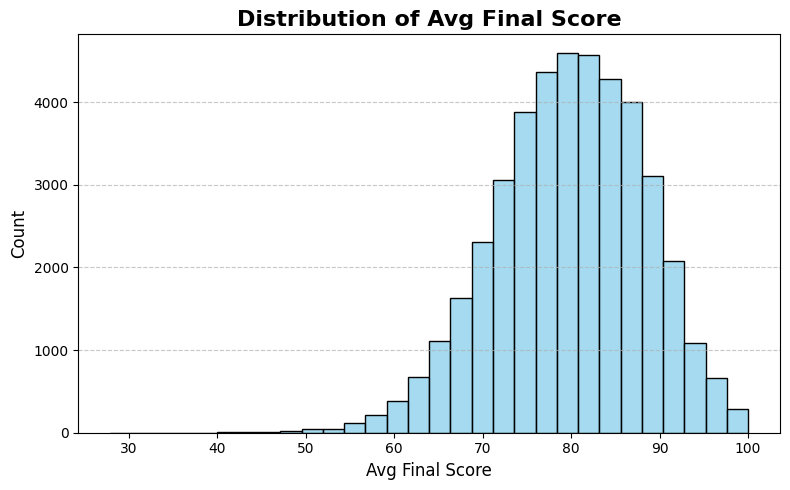

In [39]:
#Checking the distribution of the average final score for all the years so the distribution will be clearer
plt.figure(figsize=(8, 5))
sb.histplot(data=bagrut_all_years, x='Avg_Final_Score',bins=30, color='skyblue')
plt.title('Distribution of Avg Final Score', fontsize=16, fontweight='bold')
plt.xlabel('Avg Final Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#The distribution of the average final score is normal and most of the scores between ~75-85
#   → most of the students passed the bagrut over the years

## Differences Between Sectors and Denominatins

In [40]:
bagrut_all_years['Sector'].value_counts().sort_values(ascending=False).to_frame()

,count
Sector,
יהודי,32756
ערבי,6926
בדואי,1889
דרוזי,983


In [41]:
Num_examinees=bagrut_all_years.groupby('Sector')['Number_of_Examinees'].sum()
Num_examinees.sort_values(ascending=False).to_frame()

,Number_of_Examinees
Sector,
יהודי,1714395
ערבי,351501
בדואי,89092
דרוזי,50230


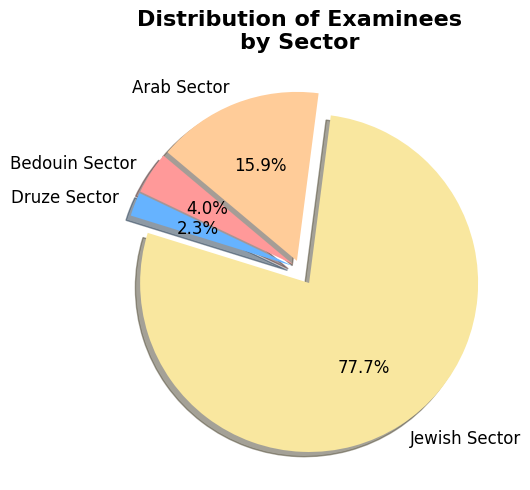

In [42]:
#Checking the distribution of the number of examinees by sector
plt.figure(figsize=(8,5),facecolor='none')
plt.pie(Num_examinees.values
        ,labels= ['Bedouin Sector', 'Druze Sector', 'Jewish Sector', 'Arab Sector']
        ,shadow=True
        ,colors=['#ff9999', '#66b3ff', '#F9E79F', '#ffcc99']
        ,autopct='%1.1f%%'
        ,explode=(0.05, 0.05, 0.1, 0.05)
        ,startangle=140
        ,textprops={'fontsize': 12})
plt.title('Distribution of Examinees\nby Sector', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

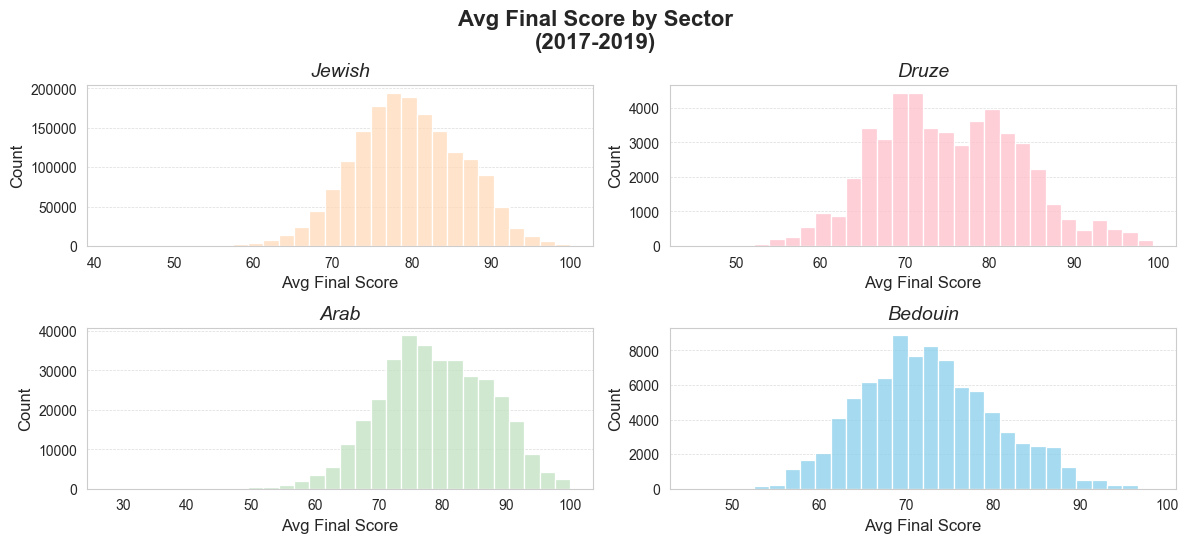

In [43]:
#Checking the distribution of the average final score for each sector
Bedouin=bagrut_all_years[bagrut_all_years['Sector']=='בדואי'][['Avg_Final_Score','Number_of_Examinees']]
Druze=bagrut_all_years[bagrut_all_years['Sector']=='דרוזי'][['Avg_Final_Score','Number_of_Examinees']]
Jewish=bagrut_all_years[bagrut_all_years['Sector']=='יהודי'][['Avg_Final_Score','Number_of_Examinees']]
Arab=bagrut_all_years[bagrut_all_years['Sector']=='ערבי'][['Avg_Final_Score','Number_of_Examinees']]

sb.set_style("whitegrid")
plt.figure(figsize=(12, 10))
plt.suptitle('Avg Final Score by Sector\n(2017-2019)', fontsize=16, fontweight='bold')

plt.subplot(4,2,1)
plt.title('Jewish', fontsize=14, fontstyle='italic')
#number of examinees as weight for more accuracy
sb.histplot(data=Jewish, x='Avg_Final_Score',weights='Number_of_Examinees', bins=30, color='#FFDAB9')
plt.xlabel('Avg Final Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5)
plt.gca().xaxis.grid(False) #removing the grid from the x axis

plt.subplot(4,2,2)
plt.title('Druze', fontsize=14, fontstyle='italic')
sb.histplot(data=Druze, x='Avg_Final_Score',weights='Number_of_Examinees', bins=30, color='#FFC0CB')
plt.xlabel('Avg Final Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5)
plt.gca().xaxis.grid(False)

plt.subplot(4,2,3)
plt.title('Arab', fontsize=14, fontstyle='italic')
sb.histplot(data=Arab, x='Avg_Final_Score',weights='Number_of_Examinees', bins=30, color='#C1E1C1')
plt.xlabel('Avg Final Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5)
plt.gca().xaxis.grid(False)

plt.subplot(4,2,4)
plt.title('Bedouin', fontsize=14, fontstyle='italic') 
sb.histplot(data=Bedouin, x='Avg_Final_Score',weights='Number_of_Examinees', bins=30, color='#87CEEB')
plt.xlabel('Avg Final Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5)
plt.gca().xaxis.grid(False)

plt.tight_layout()
plt.show()

# Jewish sector: Normal distribution, peak around 80, relatively narrow spread → high and consistent performance
# Arab sector: Peak around 75, noticeable presence of scores above 80 → positive trend
# Bedouin & Druze sectors: Higher proportion of scores below 70 compared to Jewish and Arab sectors
# Druze sector: Two distinct peaks around 70 and 80 → indicates internal performance gap

In [44]:
#The jewish sector is divided into 3 denominations
Orthodox=bagrut_all_years[(bagrut_all_years['Sector']=='יהודי') & (bagrut_all_years['Supervision']=='דתי')]
Orthodox[['Sector','Supervision','District']].value_counts().to_frame()

count
Sector Supervision District             
יהודי  דתי         חינוך התישבותי   1864
                   מרכז             1475
                   ירושלים          1423
                   תל אביב          1412
                   דרום             1270
                   מנח'י            1161
                   צפון              767
                   חיפה              524

In [45]:
Ultra_orthodox=bagrut_all_years[bagrut_all_years['District']=='חרדי']
Ultra_orthodox[['Sector','Supervision','District']].value_counts().to_frame()

,,,count
Sector,Supervision,District,
יהודי,עצמאי,חרדי,3018


In [46]:
General=bagrut_all_years[(bagrut_all_years['Sector']=='יהודי') & (bagrut_all_years['Supervision']=='כללי')]
General[['Sector','Supervision','District']].value_counts().to_frame()

count
Sector Supervision District             
יהודי  כללי        חינוך התישבותי   4109
                   תל אביב          4074
                   מרכז             3629
                   דרום             2642
                   חיפה             2063
                   צפון             1369
                   מנח'י            1014
                   ירושלים           919

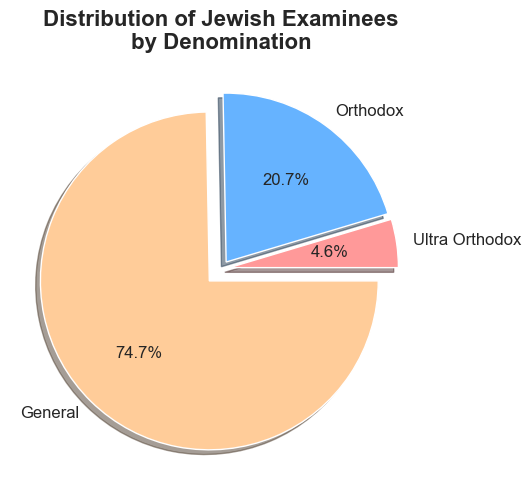

In [47]:
#Checking the distribusion of the number of examinees by denominations
orthodox_sum = Orthodox['Number_of_Examinees'].sum()
ultra_orthodox_sum = Ultra_orthodox['Number_of_Examinees'].sum()
general_sum = General['Number_of_Examinees'].sum()

plt.figure(figsize=(8, 5), facecolor='none')
plt.pie([ultra_orthodox_sum, orthodox_sum, general_sum]
        ,labels=['Ultra Orthodox', 'Orthodox', 'General']
        ,shadow=True
        ,colors=['#ff9999', '#66b3ff', '#ffcc99']
        ,autopct='%1.1f%%'
        ,explode=(0.05, 0.05, 0.1)
        ,textprops={'fontsize': 12})
plt.title('Distribution of Jewish Examinees\nby Denomination', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Ultra-Orthodox sector: low number of bagrut examinees, many study Torah and Talmud in yeshivas
#  → explains the reduced participation in exams

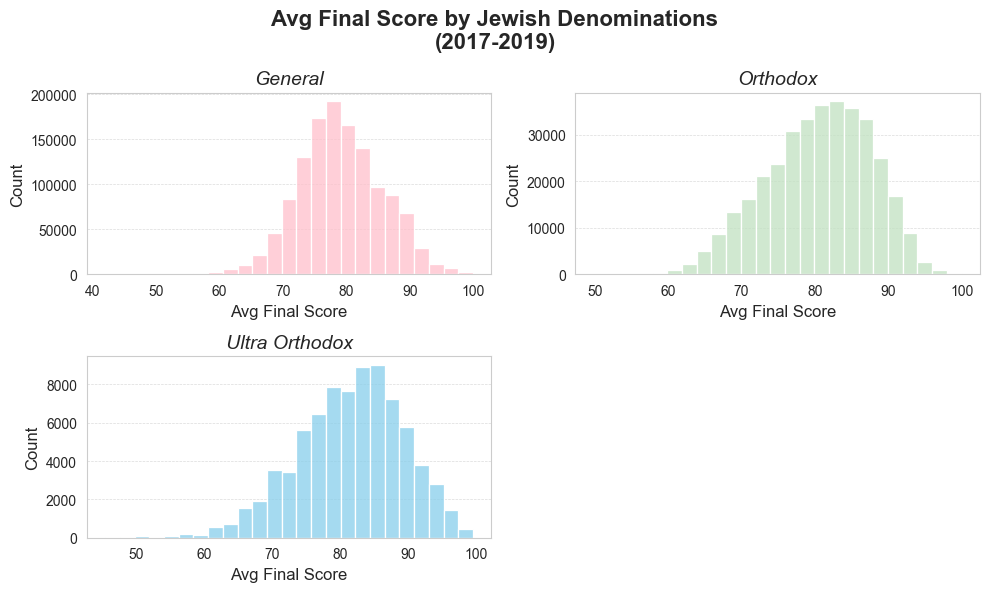

In [48]:
plt.figure(figsize=(10, 6))
plt.suptitle('Avg Final Score by Jewish Denominations\n(2017-2019)', fontsize=16, fontweight='bold')

plt.subplot(2,2,1)
plt.title('General', fontsize=14, fontstyle='italic')
sb.histplot(data=General, x='Avg_Final_Score',weights='Number_of_Examinees',bins=25, color='#FFC0CB')
plt.xlabel('Avg Final Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5)
plt.gca().xaxis.grid(False)

plt.subplot(2,2,2)
plt.title('Orthodox', fontsize=14, fontstyle='italic')
sb.histplot(data=Orthodox, x='Avg_Final_Score', weights='Number_of_Examinees',bins=25, color='#C1E1C1')
plt.xlabel('Avg Final Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5)
plt.gca().xaxis.grid(False)

plt.subplot(2,2,3)
plt.title('Ultra Orthodox', fontsize=14, fontstyle='italic')
sb.histplot(data=Ultra_orthodox, x='Avg_Final_Score',weights='Number_of_Examinees',bins=25, color='#87CEEB')
plt.xlabel('Avg Final Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5)
plt.gca().xaxis.grid(False)

plt.tight_layout()
plt.show()

#All distributions appear normal
#Wider spread of scores seen in Ultra-Orthodox and General sectors → greater diversity in student performance
#Orthodox sector achieved the highest average score (~85) → strongest performance
#Ultra-Orthodox sector scored slightly lower on average → still relatively strong
#General sector averaged around 75, with a much larger sample size


## Trends Over Time:

In [49]:
#Checking for differences in average final score across years within the same sector
Mean_score_by_year_and_sector = bagrut_all_years.groupby(['Year', 'Sector'], as_index=False)\
    .agg( Avg_Final_Score=
        ('Avg_Final_Score'
        ,lambda x: np.average(x, weights=bagrut_all_years.loc[x.index, 'Number_of_Examinees'])
        )#takes the value of avg_finale_score and returns the number of examinees for that row
).sort_values(by=['Sector','Year']).reset_index(drop=True)

sector_en = {
    'בדואי':'Bedouin',
    'דרוזי':'Druze',
    'יהודי':'Jewish',
    'ערבי':'Arab'
} # dictionary for the sector names in english for the plot display

Mean_score_by_year_and_sector['Sector_en'] = Mean_score_by_year_and_sector['Sector'].replace(sector_en)

Mean_score_by_year_and_sector

,Year,Sector,Avg_Final_Score,Sector_en
0,2017,בדואי,73.324981,Bedouin
1,2018,בדואי,72.402947,Bedouin
2,2019,בדואי,72.090910,Bedouin
3,2017,דרוזי,75.457541,Druze
4,2018,דרוזי,75.337859,Druze
5,2019,דרוזי,74.992056,Druze
6,2017,יהודי,79.584632,Jewish
7,2018,יהודי,79.407590,Jewish
8,2019,יהודי,79.536719,Jewish
9,2017,ערבי,79.228703,Arab


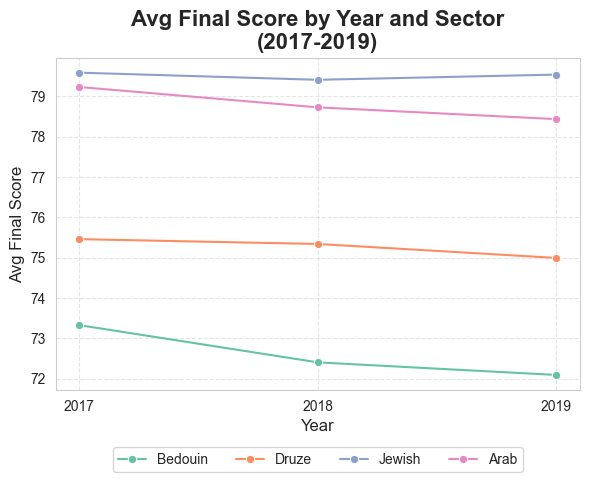

In [50]:
plt.figure(figsize=(6, 5))
plt.title('Avg Final Score by Year and Sector\n(2017-2019)', fontsize=16, fontweight='bold')
sb.lineplot(data=Mean_score_by_year_and_sector,x='Year', y='Avg_Final_Score' , hue='Sector_en', marker='o',palette='Set2')
plt.xticks([2017, 2018, 2019])
plt.ylabel('Avg Final Score', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.tight_layout()
plt.show()

# Jewish sector has the highest average final score
# Bedouin sector shows the lowest average final score
# Average score across all sectors is decreasing over the years

In [51]:
#Checking the change precent in the average final score for each sector and year
b_mean_2017=Mean_score_by_year_and_sector[
    (Mean_score_by_year_and_sector['Year']==2017) &
    (Mean_score_by_year_and_sector['Sector_en']=='Bedouin')]\
    ['Avg_Final_Score']

b_mean_2019=Mean_score_by_year_and_sector[
    (Mean_score_by_year_and_sector['Year']==2019) &
    (Mean_score_by_year_and_sector['Sector_en']=='Bedouin')]\
    ['Avg_Final_Score']

d_mean_2017=Mean_score_by_year_and_sector[
    (Mean_score_by_year_and_sector['Year']==2017) &
    (Mean_score_by_year_and_sector['Sector_en']=='Druze')]\
    ['Avg_Final_Score']

d_mean_2019=Mean_score_by_year_and_sector[
    (Mean_score_by_year_and_sector['Year']==2019) &
    (Mean_score_by_year_and_sector['Sector_en']=='Druze')]\
    ['Avg_Final_Score']

j_mean_2017=Mean_score_by_year_and_sector[
    (Mean_score_by_year_and_sector['Year']==2017) &
    (Mean_score_by_year_and_sector['Sector_en']=='Jewish')]\
    ['Avg_Final_Score']

j_mean_2019=Mean_score_by_year_and_sector[
    (Mean_score_by_year_and_sector['Year']==2019) &
    (Mean_score_by_year_and_sector['Sector_en']=='Jewish')]\
    ['Avg_Final_Score']

a_mean_2017=Mean_score_by_year_and_sector[
    (Mean_score_by_year_and_sector['Year']==2017) &
    (Mean_score_by_year_and_sector['Sector_en']=='Arab')]\
    ['Avg_Final_Score']

a_mean_2019=Mean_score_by_year_and_sector[
    (Mean_score_by_year_and_sector['Year']==2019) &
    (Mean_score_by_year_and_sector['Sector_en']=='Arab')]\
    ['Avg_Final_Score']

change_precent_b = (b_mean_2019.iloc[0] - b_mean_2017.iloc[0]) / b_mean_2017.iloc[0] * 100
change_precent_d = (d_mean_2019.iloc[0] - d_mean_2017.iloc[0]) / d_mean_2017.iloc[0] * 100
change_precent_j = (j_mean_2019.iloc[0] - j_mean_2017.iloc[0]) / j_mean_2017.iloc[0] * 100
change_precent_a = (a_mean_2019.iloc[0] - a_mean_2017.iloc[0]) / a_mean_2017.iloc[0] * 100

change_precent = pd.DataFrame({
    'Sector': ['Bedouin', 'Druze', 'Jewish', 'Arab'],
    'Change_Percent': [change_precent_b, change_precent_d, change_precent_j, change_precent_a]
})
change_precent

# Bedouin sector shows the largest decline → may indicate growing educational challenges
# Arab and Druze sectors also show a decline
# Jewish sector remains nearly stable → suggests consistent performance over time
# Overall: All sectors show a decline in average scores
#  → may reflect systemic issues or changes in exam difficulty

,Sector,Change_Percent
0,Bedouin,-1.683016
1,Druze,-0.616883
2,Jewish,-0.060204
3,Arab,-1.004535


In [52]:
#Creating a new df with the average final score for each denomination and year

Orthodox_avg = Orthodox.groupby('Year').agg(
    Avg_Final_Score=('Avg_Final_Score'
                    ,lambda x: np.average(x, weights=Orthodox.loc[x.index, 'Number_of_Examinees'])
                    )
).reset_index()

Ultra_orthodox_avg = Ultra_orthodox.groupby('Year').agg(
    Avg_Final_Score=('Avg_Final_Score'
                    ,lambda x: np.average(x, weights=Ultra_orthodox.loc[x.index, 'Number_of_Examinees'])
                    )
).reset_index()

General_avg = General.groupby('Year').agg(
    Avg_Final_Score=('Avg_Final_Score'
                    ,lambda x: np.average(x, weights=General.loc[x.index, 'Number_of_Examinees'])
                    )
).reset_index()

Orthodox_avg['Denomination'] = 'Orthodox'
Ultra_orthodox_avg['Denomination'] = 'Ultra_orthodox'
General_avg['Denomination'] = 'General'

Mean_score_by_year_and_denominations = pd.concat([Orthodox_avg, Ultra_orthodox_avg, General_avg], ignore_index=True)

Mean_score_by_year_and_denominations

,Year,Avg_Final_Score,Denomination
0,2017,80.627346,Orthodox
1,2018,80.436330,Orthodox
2,2019,80.489762,Orthodox
3,2017,81.346125,Ultra_orthodox
4,2018,81.539474,Ultra_orthodox
5,2019,81.541431,Ultra_orthodox
6,2017,79.190828,General
7,2018,78.986431,General
8,2019,79.145988,General


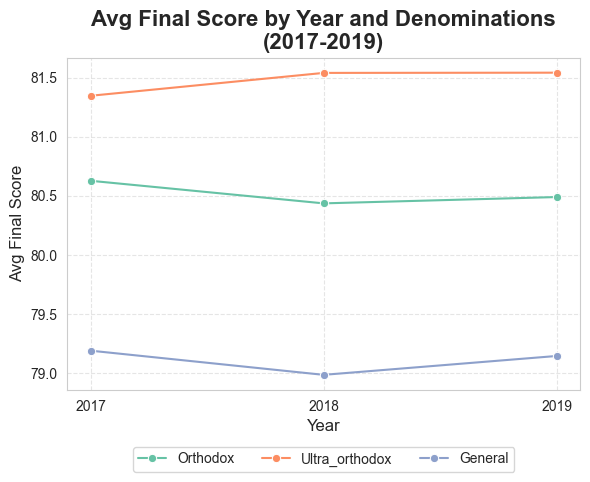

In [53]:
plt.figure(figsize=(6, 5))
plt.title('Avg Final Score by Year and Denominations\n(2017-2019)', fontsize=16, fontweight='bold')
sb.lineplot(data=Mean_score_by_year_and_denominations, x='Year', y='Avg_Final_Score' , hue='Denomination',
            marker='o', palette='Set2')
plt.xticks([2017, 2018, 2019])
plt.ylabel('Avg Final Score',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.tight_layout()
plt.show()

# Ultra-Orthodox denomination has the highest average final score
#  → strongest performance among Jewish denominations
# General denomination shows the lowest average score
# While Orthodox and General scores are decreasing → Ultra-Orthodox scores are increasing over time
# This is notable since Ultra-Orthodox students focus on different subjects
#  → curriculum differences may influence performance

In [54]:
#Checking the change precent in the average final score for each denomination and year
u_mean_2017 = Mean_score_by_year_and_denominations[
    (Mean_score_by_year_and_denominations['Year'] == 2017) &
    (Mean_score_by_year_and_denominations['Denomination'] == 'Ultra_orthodox')]\
    ['Avg_Final_Score']

u_mean_2019 = Mean_score_by_year_and_denominations[
    (Mean_score_by_year_and_denominations['Year'] == 2019) &
    (Mean_score_by_year_and_denominations['Denomination'] == 'Ultra_orthodox')]\
    ['Avg_Final_Score']

o_mean_2017 = Mean_score_by_year_and_denominations[
    (Mean_score_by_year_and_denominations['Year'] == 2017) &
    (Mean_score_by_year_and_denominations['Denomination'] == 'Orthodox')]\
    ['Avg_Final_Score']

o_mean_2019 = Mean_score_by_year_and_denominations[
    (Mean_score_by_year_and_denominations['Year'] == 2019) &
    (Mean_score_by_year_and_denominations['Denomination'] == 'Orthodox')]\
    ['Avg_Final_Score']

g_mean_2017 = Mean_score_by_year_and_denominations[
    (Mean_score_by_year_and_denominations['Year'] == 2017) &
    (Mean_score_by_year_and_denominations['Denomination'] == 'General')]\
    ['Avg_Final_Score']

g_mean_2019 = Mean_score_by_year_and_denominations[
    (Mean_score_by_year_and_denominations['Year'] == 2019) &
    (Mean_score_by_year_and_denominations['Denomination'] == 'General')]\
    ['Avg_Final_Score']

change_percent_u = (u_mean_2019.iloc[0] - u_mean_2017.iloc[0]) / u_mean_2017.iloc[0] * 100
change_percent_o = (o_mean_2019.iloc[0] - o_mean_2017.iloc[0]) / o_mean_2017.iloc[0] * 100
change_percent_g = (g_mean_2019.iloc[0] - g_mean_2017.iloc[0]) / g_mean_2017.iloc[0] * 100

change_percent_denom = pd.DataFrame({
    'Denomination': ['Ultra_orthodox', 'Orthodox', 'General'],
    'Change_Percent': [change_percent_u, change_percent_o, change_percent_g]
})

change_percent_denom
# Ultra-Orthodox denomination shows a slight increase in average score → positive and unique trend
# Orthodox and General denominations show small decreases → slight negative trend
# Ultra-Orthodox performance is improving while others decline 
#   → maybe its related to the different subjects they learn

,Denomination,Change_Percent
0,Ultra_orthodox,0.240093
1,Orthodox,-0.170642
2,General,-0.056623


## Subject Performance:

In [55]:
bagrut_all_years['Subject'].unique().size

116

In [56]:
bagrut_all_years.groupby('Sector')['Subject'].nunique().to_frame()

,Subject
Sector,
בדואי,45
דרוזי,46
יהודי,109
ערבי,65


In [57]:
#Because the subjects are in hebrew, creating a dictionary for the subjects in english
subject_en = {
    'אזרחות': 'Civics',
    'אנגלית': 'English',
    'ביולוגיה': 'Biology',
    "הסטוריה לבי'ס ערבי": "History (Arab Schools)",
    'כימיה': 'Chemistry',
    'מדעי לימודי הסביבה': 'Environmental Science',
    'מערכות תקשוב': 'IT Systems',
    'מתמטיקה': 'Mathematics',
    "עברית לבי'ס ערבי": "Hebrew (Arab Schools)",
    'ערבית לערבים': 'Arabic (for Arabs)',
    'הבעה עברית': 'Hebrew Expression',
    'הסטוריה': 'History',
    'מחשבת ישראל וספרות': 'Jewish Thought and Literature',
    "תושבע'פ ותלמוד": 'Talmud and Oral Torah',
    "תנ'ך": 'Bible Studies',
    'למודי ארץ ישראל וארכ': 'Land of Israel and Archaeology',
    'תשתיות מחשוב ותקשוב': 'Computing and Communication Infrastructure',
    'חקלאות': 'Agriculture',
    'מדע וטכנולוגיה לכל': 'Science and Technology for All',
    'מחשבת ישראל לבי"ס דת': 'Jewish Thought (Religious Schools)',
    'ספרות': 'Literature',
    'עצוב': 'Design',
    'פסיכולוגיה התפתחותית': 'Developmental Psychology',
    'מדעי החברה': 'Social Sciences',
    'אלקטרוניקה ומחשבים': 'Electronics and Computers',
    'מערכות אלקטרוניות': 'Electronic Systems',
    'גאוגרפיה': 'Geography',
    'מדעי המחשב': 'Computer Science',
    'מחשבת ישראל לבי"ס כל': 'Jewish Thought (General Schools)',
    'מנהל תיירותי': 'Tourism Management',
    'ניהול משאבי אנוש': 'Human Resources Management',
    "ערבית לבי'ס יהודי": "Arabic (Jewish Schools)",
    'פיסיקה': 'Physics',
    'תאטרון': 'Theater',
    'תיירות': 'Tourism',
    'אמנות שימושית': 'Applied Art',
    'אמנות )הקולנוע(': 'Cinema Art',
    'ישומים בביוטכנולוגיה': 'Biotechnology Applications',
    'מערכות ביוטכנולוגיה': 'Biotechnology Systems',
    'אומנות': 'Art',
    'תכנון ותכנות מערכות': 'Systems Planning and Programming',
    'מוסיקה': 'Music',
    'ספרדית': 'Spanish',
    'פילוסופיה': 'Philosophy',
    'תקשורת )בנתיב העיוני': 'Communication (Academic Track)',
    'בקרת מכונות': 'Machine Control',
    'תולדות הערבים והאיסל': 'History of Arabs and Islam',
    'תקשורת בינלאומית )אנ': 'International Communication (English)',
    'הפקות בתקשורת': 'Media Production',
    'חנוך גופני': 'Physical Education',
    'תקשורת וחברה': 'Communication and Society',
    'מחול': 'Dance',
    'מנהל וכלכלה': 'Management and Economics',
    'טכנולוגיה מוכללת': 'Integrated Technology',
    'טכנולוגית בנייה': 'Building Technology',
    'מדעי ההנדסה': 'Engineering Sciences',
    'ניהול הייצור': 'Production Management',
    'ניהול ותפעול': 'Operations Management',
    'מערכות חשמל': 'Electrical Systems',
    'דת האסלם': 'Islamic Religion',
    'מכניקה הנדסית': 'Engineering Mechanics',
    'מערכות מכונאות רכב': 'Automotive Systems',
    'רישומי פעילויות בחינ': 'Education Activity Records',
    'מערכות פקוד ובקרה': 'Command and Control Systems',
    'מדעי הים': 'Marine Sciences',
    'ניהול מלונאי': 'Hotel Management',
    'שווק וקדום מכירות': 'Marketing and Sales Promotion',
    'תחזוקת מערכות מכניות': 'Mechanical Systems Maintenance',
    'מכטרוניקה': 'Mechatronics',
    'רוסית': 'Russian',
    "תושבע'פ לבי'ס כללי": 'Oral Torah (General Schools)',
    'מדעי הבריאות': 'Health Sciences',
    'מערכות ניהול מידע וי': 'Information Systems Management',
    'מערכות רפואיות': 'Medical Systems',
    'אופטיקה יישומית': 'Applied Optics',
    'מחשבים ומערכות': 'Computers and Systems',
    'אדריכלות ועצוב פנים': 'Architecture and Interior Design',
    'צרפתית': 'French',
    'מערכות תיב"מ': 'CAD/CAM Systems',
    'מערכות רכב': 'Vehicle Systems',
    'תכנון הנדסי של מבנים': 'Structural Engineering Design',
    'אוטו-טק מערכות ממוחש': 'Auto-Tech Systems',
    'אומניות הבשול המלונא': 'Culinary Arts and Hospitality',
    'מדעי התזונה': 'Nutritional Sciences',
    'עיצוב וטיפוח החן': 'Design and Beauty Care',
    'עצוב אופנה': 'Fashion Design',
    'מערכות תעופה': 'Aviation Systems',
    'טלוויזיה וקולנוע': 'Television and Film',
    'מדעי כדור הארץ': 'Earth Sciences',
    'יהדות': 'Judaism',
    'חשבונאות': 'Accounting',
    'אידיש': 'Yiddish',
    'צלום': 'Photography',
    'פרסית': 'Persian',
    'מידע וידע באינטרנט': 'Internet Information and Knowledge',
    'ניתוח ואיתור מידע די': 'Data Analysis and Retrieval',
    'גרמנית': 'German',
    'מדע חישובי': 'Computational Science',
    "הסטוריה לבי'ס דרוזי": "History (Druze Schools)",
    'עברית לבי"ס דרוזי': 'Hebrew (Druze Schools)',
    'ערבית לדרוזים': 'Arabic (for Druze)',
    'ימאות וספינות': 'Seamanship and Ships',
    'מורשת דרוזית': 'Druze Heritage',
    'אמהרית': 'Amharic',
    'איטלקית': 'Italian',
    'מחשוב ובקרה': 'Computing and Control',
    'תרמודינמיקה טכנית': 'Technical Thermodynamics',
    'חוק ומשפט': 'Law and Legal Studies',
    'סוציולוגיה': 'Sociology',
    'סינית': 'Chinese',
    'יהדות לממלכתי דתי': 'Judaism (Religious State)',
    'הגנת הסייבר': 'Cybersecurity',
    'תולדות הערבים )בי"ס': 'Arab History (Schools)',
    "מוט'ב-מדע וטכ' וחברה": 'Science, Technology and Society',
    'מערכות מידענות ממוחש': 'Information Management Systems',
    'מדעי הטכנולוגיה': 'Technology Studies'
}

# Mapping the 'Subject' column using the 'subject_en' dictionary and creating a new column 'Subject_en'
bagrut_all_years['Subject_en'] = bagrut_all_years['Subject'].map(subject_en)
bagrut_all_years

,Avg_Final_Score,Number_of_Examinees,Units,Year,Subject,City,Institution_Name,Institution_Code,Supervision,Sector,District,Subject_en
0,72.38,66,2,2019,אזרחות,אבו גוש,מקיף אבו גוש,148080,כללי,ערבי,ירושלים,Civics
1,75.00,32,3,2019,אנגלית,אבו גוש,מקיף אבו גוש,148080,כללי,ערבי,ירושלים,English
2,74.44,16,4,2019,אנגלית,אבו גוש,מקיף אבו גוש,148080,כללי,ערבי,ירושלים,English
3,81.81,21,5,2019,אנגלית,אבו גוש,מקיף אבו גוש,148080,כללי,ערבי,ירושלים,English
4,77.19,32,5,2019,ביולוגיה,אבו גוש,מקיף אבו גוש,148080,כללי,ערבי,ירושלים,Biology
...,...,...,...,...,...,...,...,...,...,...,...,...
42549,94.62,47,3,2017,ניהול משאבי אנוש,תל אביב - יפו,בית יעקב,570606,עצמאי,יהודי,חרדי,Human Resources Management
42550,74.46,26,2,2017,ספרות,תל אביב - יפו,בית יעקב,570606,עצמאי,יהודי,חרדי,Literature
42551,94.67,24,5,2017,עצוב,תל אביב - יפו,בית יעקב,570606,עצמאי,יהודי,חרדי,Design
42552,97.00,19,5,2017,תכנון ותכנות מערכות,תל אביב - יפו,בית יעקב,570606,עצמאי,יהודי,חרדי,Systems Planning and Programming


In [58]:
#Creating a new df with the top 10 bagrut subjects with the highest number of examinees per sector
Jewish_top_subjects = bagrut_all_years[bagrut_all_years['Sector']=='יהודי']\
    .groupby('Subject_en')['Number_of_Examinees'].sum()\
    .sort_values(ascending=False).head(10).reset_index()

Bedouin_top_subjects = bagrut_all_years[bagrut_all_years['Sector']=='בדואי']\
    .groupby('Subject_en')['Number_of_Examinees'].sum()\
    .sort_values(ascending=False).head(10).reset_index()

Arab_top_subjects = bagrut_all_years[bagrut_all_years['Sector']=='ערבי']\
    .groupby('Subject_en')['Number_of_Examinees'].sum()\
    .sort_values(ascending=False).head(10).reset_index()

Druze_top_subjects = bagrut_all_years[bagrut_all_years['Sector']=='דרוזי']\
    .groupby('Subject_en')['Number_of_Examinees'].sum()\
    .sort_values(ascending=False).head(10).reset_index()

top_subjects = pd.concat([Jewish_top_subjects['Subject_en'], Bedouin_top_subjects['Subject_en'],
                          Arab_top_subjects['Subject_en'], Druze_top_subjects['Subject_en']], axis=1)

top_subjects.columns = ['Jewish','Bedouin' , 'Arab', 'Druze']

top_subjects

,Jewish,Bedouin,Arab,Druze
0,Hebrew Expression,History (Arab Schools),History (Arab Schools),History (Druze Schools)
1,History,Hebrew (Arab Schools),English,English
2,Bible Studies,Civics,Civics,Hebrew (Druze Schools)
3,Civics,English,Hebrew (Arab Schools),Arabic (for Druze)
4,English,Arabic (for Arabs),Arabic (for Arabs),Civics
5,Mathematics,Mathematics,Mathematics,Mathematics
6,Literature,Biology,Biology,Biology
7,Talmud and Oral Torah,Environmental Science,Chemistry,Chemistry
8,Jewish Thought and Literature,Chemistry,Environmental Science,Physics
9,Biology,Developmental Psychology,Physics,Electronics and Computers


In [59]:
#Its not relevant for now to check the subjects with brackets
Bedouin_top_subjects['Subject_en']=Bedouin_top_subjects['Subject_en'].replace(r'\(.*?\)', '', regex=True).str.strip()
#.*?=any characters between the brackets
Druze_top_subjects['Subject_en']=Druze_top_subjects['Subject_en'].replace(r'\(.*?\)', '', regex=True).str.strip()
Jewish_top_subjects['Subject_en']=Jewish_top_subjects['Subject_en'].replace(r'\(.*?\)', '', regex=True).str.strip()
Arab_top_subjects['Subject_en']=Arab_top_subjects['Subject_en'].replace(r'\(.*?\)', '', regex=True).str.strip()

top_subjects = pd.concat([Jewish_top_subjects['Subject_en'], Bedouin_top_subjects['Subject_en'],
                          Arab_top_subjects['Subject_en'], Druze_top_subjects['Subject_en']], axis=1)

top_subjects.columns = ['Jewish','Bedouin' , 'Arab', 'Druze']

top_subjects

,Jewish,Bedouin,Arab,Druze
0,Hebrew Expression,History,History,History
1,History,Hebrew,English,English
2,Bible Studies,Civics,Civics,Hebrew
3,Civics,English,Hebrew,Arabic
4,English,Arabic,Arabic,Civics
5,Mathematics,Mathematics,Mathematics,Mathematics
6,Literature,Biology,Biology,Biology
7,Talmud and Oral Torah,Environmental Science,Chemistry,Chemistry
8,Jewish Thought and Literature,Chemistry,Environmental Science,Physics
9,Biology,Developmental Psychology,Physics,Electronics and Computers


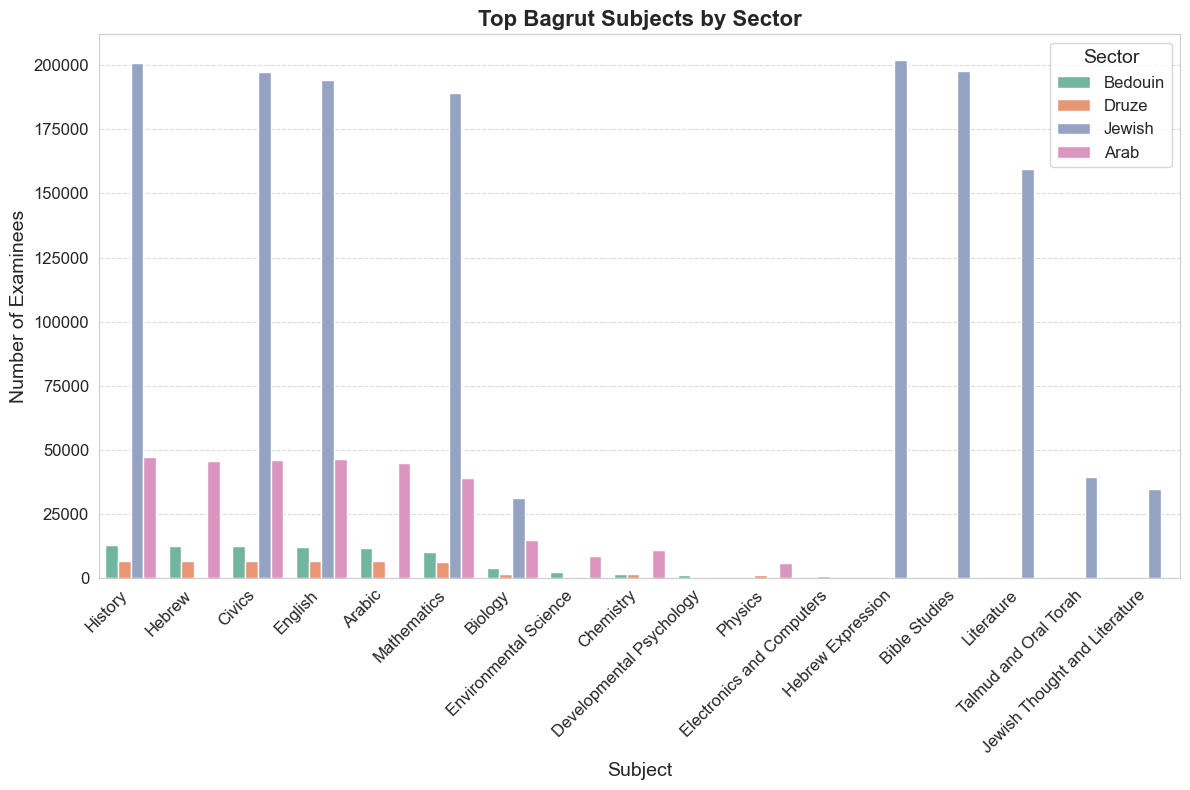

In [60]:
plot_data = pd.concat([
    Bedouin_top_subjects.assign(Sector='Bedouin'),
    Druze_top_subjects.assign(Sector='Druze'),
    Jewish_top_subjects.assign(Sector='Jewish'),
    Arab_top_subjects.assign(Sector='Arab')
])

plot_data = plot_data.drop_duplicates(subset=['Subject_en', 'Sector'])

plt.figure(figsize=(12, 8))
sb.barplot(data=plot_data, x='Subject_en', y='Number_of_Examinees', hue='Sector', palette='Set2')
plt.title('Top Bagrut Subjects by Sector', fontsize=16, fontweight='bold')
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Number of Examinees', fontsize=14)
plt.xticks(rotation=45, ha='right',fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Sector', title_fontsize=14, fontsize=12, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Most of the subjects in the non-Jewish sectors are classic Bagrut subjects in Israel
#The subjects in the Jewish sector are a bit different, with more religious studies present → 
#   maybe influenced by Ultra-Orthodox and Orthodox schools
#From personal experience in the Jewish sector: 
#   religious subjects (e.g. Bible) are also common in general schools
#Hebrew language subjects appear more in the Jewish sector 
#   → makes sense, as Hebrew is the main language in Israel

In [61]:
Orthodox = Orthodox.copy()
Ultra_orthodox = Ultra_orthodox.copy()
General = General.copy() #Creating copies of the dataframes to avoid 'SettingWithCopyWarning'

Orthodox['Subject_en'] = Orthodox['Subject'].map(subject_en)
Ultra_orthodox['Subject_en'] = Ultra_orthodox['Subject'].map(subject_en)
General['Subject_en'] = General['Subject'].map(subject_en)

Orthodox_top_subjects = Orthodox.groupby('Subject_en')['Number_of_Examinees'].sum()\
    .sort_values(ascending=False).head(10).reset_index()

Ultra_orthodox_top_subjects = Ultra_orthodox.groupby('Subject_en')['Number_of_Examinees'].sum()\
    .sort_values(ascending=False).head(10).reset_index()

General_top_subjects = General.groupby('Subject_en')['Number_of_Examinees'].sum()\
    .sort_values(ascending=False).head(10).reset_index()

top_subjects_by_denomination = pd.concat([General_top_subjects['Subject_en'],
                                        Orthodox_top_subjects['Subject_en'],
                                        Ultra_orthodox_top_subjects['Subject_en']], axis=1)

top_subjects_by_denomination.columns = ['General', 'Orthodox', 'Ultra-Orthodox']

top_subjects_by_denomination

,General,Orthodox,Ultra-Orthodox
0,Hebrew Expression,Hebrew Expression,History
1,History,History,Hebrew Expression
2,Bible Studies,Civics,Mathematics
3,Literature,Bible Studies,Bible Studies
4,English,Talmud and Oral Torah,Civics
5,Civics,English,Literature
6,Mathematics,Mathematics,English
7,Biology,Jewish Thought and Literature,Judaism
8,Physics,Biology,Management and Economics
9,Social Sciences,Physics,Accounting


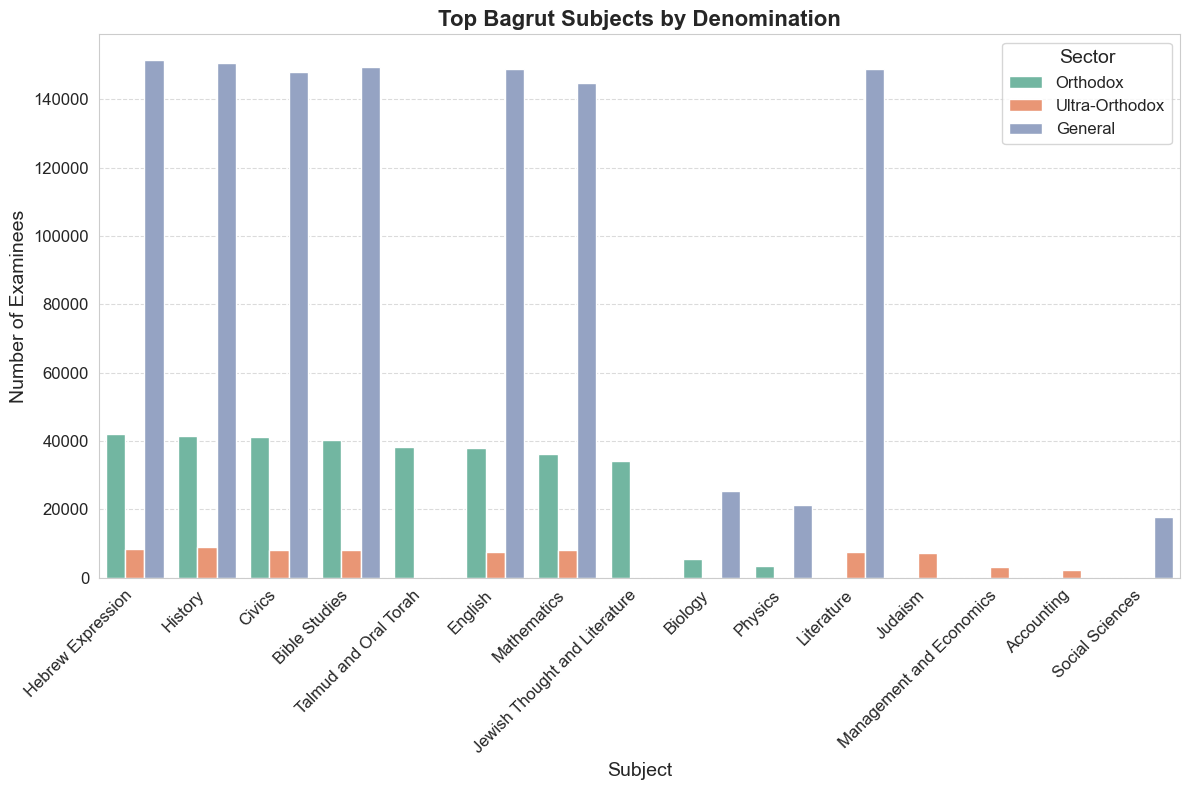

In [62]:
top_subjects_denomination = pd.concat([
    Orthodox_top_subjects.assign(Denomination='Orthodox'),
    Ultra_orthodox_top_subjects.assign(Denomination='Ultra-Orthodox'),
    General_top_subjects.assign(Denomination='General')
])

top_subjects_denomination = top_subjects_denomination.drop_duplicates(subset=['Subject_en', 'Denomination'])

plt.figure(figsize=(12, 8))
sb.barplot(data=top_subjects_denomination, x='Subject_en', y='Number_of_Examinees'
           , hue='Denomination', palette='Set2')
plt.title('Top Bagrut Subjects by Denomination', fontsize=16, fontweight='bold')
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Number of Examinees', fontsize=14)
plt.xticks(rotation=45, ha='right',fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Sector', title_fontsize=14, fontsize=12, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# The subjects in the Ultra-Orthodox sector are indeed different from other denominations
# Surprisingly, the Orthodox denomination has many religious subjects not found in the Ultra-Orthodox sector
#   For example: 'Talmud and Oral Torah' are part of the Orthodox curriculum, but not the Ultra-Orthodox
# Interesting to note that the Ultra-Orthodox denomination includes subjects like
#  'Management and Economics', 'Accounting' which are not commonly found in the other denominations

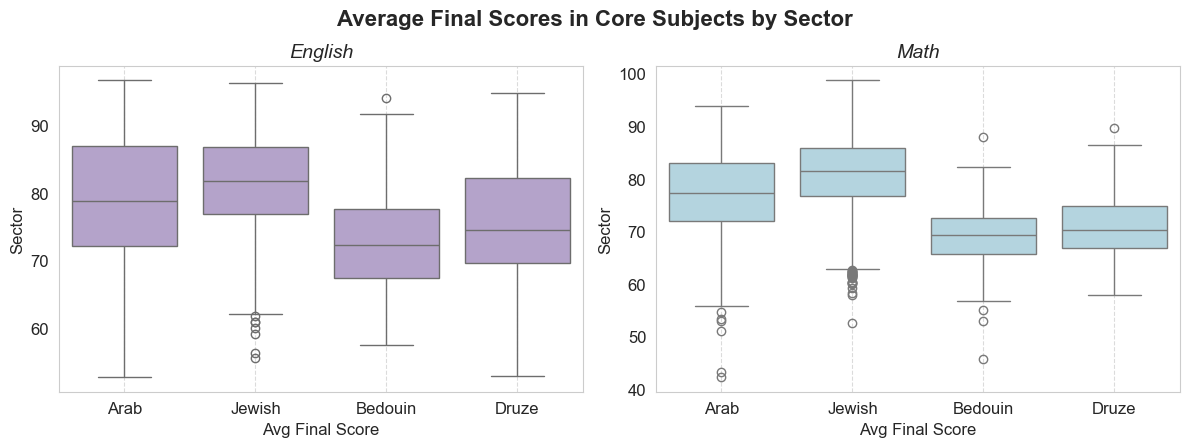

In [75]:
#Check the average final score in 3 main subjects: math, english and language(hebrew/arabic depending on the sector)
English = bagrut_all_years[bagrut_all_years['Subject_en'] == 'English'][['Sector','Avg_Final_Score']]
Mathematics = bagrut_all_years[bagrut_all_years['Subject_en'] == 'Mathematics'][['Sector','Avg_Final_Score']]

sector_en = {
    'בדואי':'Bedouin',
    'דרוזי':'Druze',
    'יהודי':'Jewish',
    'ערבי':'Arab'
}

English['Sector_en'] = English['Sector'].replace(sector_en)
Mathematics['Sector_en'] = Mathematics['Sector'].replace(sector_en)

plt.figure(figsize=(12,8))
plt.suptitle('Average Final Scores in Core Subjects by Sector', fontsize=16, fontweight='bold')

plt.subplot(2,2,1)
sb.boxplot(data=English, x='Sector_en', y='Avg_Final_Score', color='#B39CD0')
plt.title('English', fontsize=14, fontstyle='italic')
plt.xlabel('Avg Final Score', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Sector', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(False)

plt.subplot(2,2,2)
sb.boxplot(data=Mathematics, x='Sector_en', y='Avg_Final_Score', color='#ADD8E6')
plt.title('Math', fontsize=14, fontstyle='italic')
plt.xlabel('Avg Final Score', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Sector', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(False)

plt.tight_layout()
plt.show()

# Jewish students tend to have higher scores in English and Math
# Their scores are also concentrated in the higher range
# Students of all sectors show a wider spread of scores in english then in math
# Bedouin has the lowest average score in both subjects
# In Math, low scores (40–60) are mostly found in the Arab and Bedouin sectors → potential area for targeted support
# In English, low scores (40–60) are mostly found in the Arab and Druze sectors → potential area for targeted support

In [64]:
English.groupby('Sector_en')['Avg_Final_Score'].agg(['mean', 'std'])

,mean,std
Sector_en,,
Arab,79.045152,9.104880
Bedouin,72.728350,6.847919
Druze,75.622701,7.729710
Jewish,81.490866,6.398175


In [65]:
Mathematics.groupby('Sector_en')['Avg_Final_Score'].agg(['mean', 'std'])

# The means and stds show that Jewish students have the highest average scores → strongest overall performance
# Bedouin students have the lowest average scores → consistent with previous findings
# Arab students show relatively high average scores in English → however, their scores are more spread out(high std)

,mean,std
Sector_en,,
Arab,76.983946,7.792235
Bedouin,69.198410,5.538576
Druze,71.219701,6.225452
Jewish,80.973886,6.728177


In [66]:
bagrut_all_years['Subject_en'][bagrut_all_years['Subject_en'].str.startswith('Arabic')].drop_duplicates().to_frame()

,Subject_en
13,Arabic (for Arabs)
134,Arabic (Jewish Schools)
6870,Arabic (for Druze)


In [67]:
Arabic = bagrut_all_years[bagrut_all_years['Subject_en'].isin(['Arabic (for Arabs)','Arabic (for Druze)'])][['Subject_en','Sector', 'Avg_Final_Score']].copy()

In [68]:
Arabic.value_counts(["Subject_en", "Sector"]).to_frame()

# In the Jewish sector, a small number of students are recorded as studying Arabic → maybe a data error and they learned "Arabic (Jewish Schools)"
#   another possibility: non-Jewish students studying Arabic within Jewish sector schools → could explain the anomaly

count
Subject_en         Sector       
Arabic (for Arabs) ערבי      520
                   בדואי     181
Arabic (for Druze) דרוזי      89
Arabic (for Arabs) יהודי       3

In [69]:
Arabic.drop(index=Arabic[Arabic["Sector"] == "יהודי"].index, inplace=True)
Arabic.value_counts(["Subject_en", "Sector"]).to_frame()

count
Subject_en         Sector       
Arabic (for Arabs) ערבי      520
                   בדואי     181
Arabic (for Druze) דרוזי      89

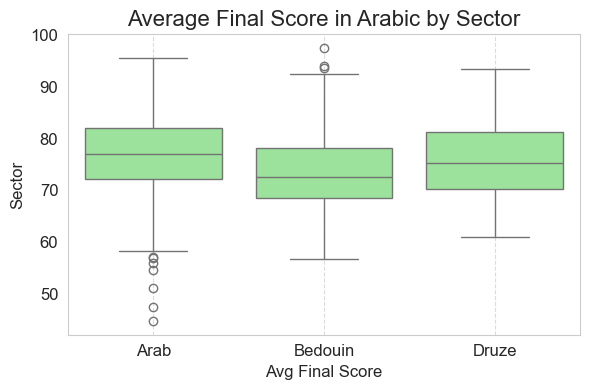

In [70]:
Arabic['Sector_en'] = Arabic['Sector'].replace(sector_en)

plt.figure(figsize=(6, 4))
sb.boxplot(data=Arabic, x='Sector_en', y='Avg_Final_Score', color='#90EE90')
plt.title('Average Final Score in Arabic by Sector', fontsize=16)
plt.xlabel('Avg Final Score', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Sector', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(False)
plt.tight_layout()
plt.show()

# Arab students have a higher average score in Arabic → strong general performance in the subject
# Druze students have more consistent scores
# Low scores are mostly found in the Arab sector → potential area for targeted support

In [71]:
Arabic.groupby('Sector_en')['Avg_Final_Score'].agg(['mean', 'std'])

# The Arab sector has the highest std → indicates more variability in student performance, although the average score is the largest

,mean,std
Sector_en,,
Arab,76.704404,7.892566
Bedouin,73.507901,7.532514
Druze,76.203034,7.446568


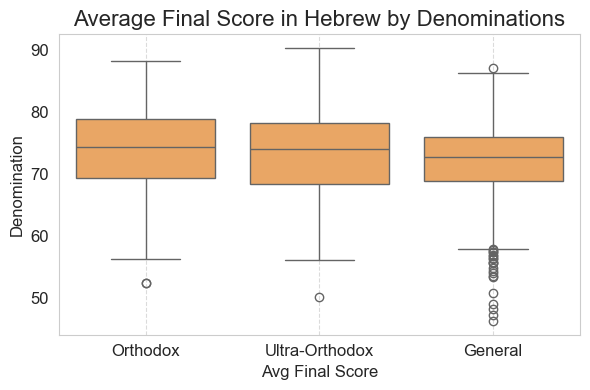

In [74]:
#Check the average final score for the 'hebrew expression' subject but by dominations
#The jewish sector doesnt have a hebrew subject, they learn a subject called 'hebrew expression'

add_denominations = pd.concat([
    Orthodox.assign(Denomination='Orthodox'),
    Ultra_orthodox.assign(Denomination='Ultra-Orthodox'),
    General.assign(Denomination='General')
])
Hebrew=add_denominations[add_denominations['Subject_en'] == 'Hebrew Expression'][['Avg_Final_Score', 'Denomination']]

plt.figure(figsize=(6, 4))
sb.boxplot(data=Hebrew, x='Denomination', y='Avg_Final_Score', color='#FFA54F')
plt.title('Average Final Score in Hebrew by Denominations', fontsize=16)
plt.xlabel('Avg Final Score', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Denomination', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(False)
plt.tight_layout()
plt.show()

# General denomination → More consistent scores
# Low scores mostly found in the General denomination 
# Ultra-Orthodox → Scores are a little bit more spread out

In [73]:
Hebrew.groupby('Denomination')['Avg_Final_Score'].agg(['mean', 'std'])

# General denomination: smallest std → Smaller gaps within the group (consistent with boxplot)
# Orthodox → Higher avarage score

,mean,std
Denomination,,
General,72.059972,5.984656
Orthodox,74.043225,6.191194
Ultra-Orthodox,73.268930,6.682836


## Summery and Conclusions


### Analysis Summary

The analysis shows that most students pass the bagrut exams over the years. The Jewish sector presents the highest average scores, while the Bedouin sector shows the lowest – a trend that persists over time. There is a general decline in average scores, particularly in the Bedouin sector (1.6%). The Druze and Arab sectors also performe a moderate decline.

The general and orthodox denominations within the Jewish sector show higher participation rates in the exams, likely due to the larger number of schools examined in this data. However, the ultra-Orthodox denomination demonstrates a continuous improvement in scores, contrary to other sectors and denominations.

Beyond the comparison of average scores across sectors and denominations, the analysis of subjects shows that core subjects are common across all sectors(e.g. english, civic, math, arabic/hebrew, history). However, religious subjects are more common in the orthodox denomination, and not in the ultra-orthodox one (e.g. talmud). Interestingly, subjects such as management and economics, and accounting appear exclusively in the ultra-orthodox denomination.

English has a wider spread of scores then in math. In math, low scores are more noticable, especially in the non-Jewish sectors. In Arabic, the Arab sector shows a higher std – indicating internal performance gaps, also this sector has more low scores. In Hebrew, the general denomination shows higher and more concentrated scores but also more low scores.

### Areas for deeper investigation:
- The decline in average scores over the years, especially in the Bedouin sector  
- Why the general denomination has lower average scores compared to other denominations  
- Performance gaps within the Arab sector  

These investigations could help improve performance across different populations and guide the ministry of education and government in allocating resources more effectively.

### Additional research options:
- Is there an influence of district on students' average scores?  
- Differences between schools within the same denomination and sectors
- Analysis of the least common bagrut subjects and the reasons behind it  
- Differences in students' averages in math and English levels (3,4,5 units)

Since this dataset is historical (up to 2019), it is important to continue examining updated data to see whether these trends have persisted in recent years.
